# Hearth Cleveland

## Descripción del dataset

- **age**: edad en años.
- **sex**: género (1 = masculino; 0 = femenino).
- **cp**: tipo de dolor en el pecho
  - Valor 1: angina típica
  - Valor 2: angina atípica
  - Valor 3: dolor no anginal
  - Valor 4: asintomático
- **trestbps**: presión arterial en reposo (en mm Hg al ingresar al hospital).
- **chol**: colesterol sérico en mg/dl.
- **fbs**: azúcar en sangre en ayunas > 120 mg/dl (1 = verdadero; 0 = falso).
- **restecg**: resultados electrocardiográficos en reposo
  - Valor 0: normal
  - Valor 1: con anormalidad de onda ST-T (inversiones de onda T y/o elevación o depresión del ST de > 0.05 mV)
  - Valor 2: muestra probable o definitiva hipertrofia ventricular izquierda según criterios de Estes.
- **thalach**: frecuencia cardíaca máxima alcanzada.
- **exang**: angina inducida por ejercicio (1 = sí; 0 = no).
- **oldpeak**: depresión del ST inducida por ejercicio en comparación con el reposo.
- **slope**: la pendiente del segmento ST del pico del ejercicio
  - Valor 1: ascendente
  - Valor 2: plano
  - Valor 3: descendente
- **ca**: número de vasos principales (0-3) coloreados por fluoroscopia (para detección de calcificación de los vasos).
- **thal**: resultados de la prueba de esfuerzo nuclear (3 = normal; 6 = defecto fijo; 7 = defecto reversible).
- **num**: variable objetivo que representa el diagnóstico de enfermedad cardíaca (estado angiográfico de la enfermedad) en cualquier vaso principal
  - Valor 0: estrechamiento del diámetro < 50%
  - Valor 1: estrechamiento del diámetro > 50% 

## Importación de librerías: 
Carga las librerías necesarias para análisis de datos, visualización, aprendizaje automático y cálculo de métricas.

In [16]:
#Importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
import itertools
from keras.models import Sequential
from keras.layers import Dense

## Carga de datos: 
Lee el conjunto de datos 'processed_cleveland.csv' y muestra las primeras cinco filas para obtener una vista previa de los datos.

In [17]:
heart_data  = pd.read_csv("processed_cleveland.csv")
heart_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


## Verificación de valores nulos: 
Calcula la suma de valores nulos en el conjunto de datos para identificar si hay datos faltantes.

In [18]:
null_values = heart_data.isnull().sum()
null_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Estadísticas descriptivas: 
Proporciona estadísticas descriptivas como media, mediana, etc., para cada columna del conjunto de datos.

In [19]:
descriptive_stats = heart_data.describe()
descriptive_stats

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


## Visualizaciones de datos: 
Utiliza gráficos de barras y histogramas para representar visualmente la distribución de cada variable en el conjunto de datos, lo cual es útil para entender la naturaleza de los datos y detectar posibles anomalías o tendencias.

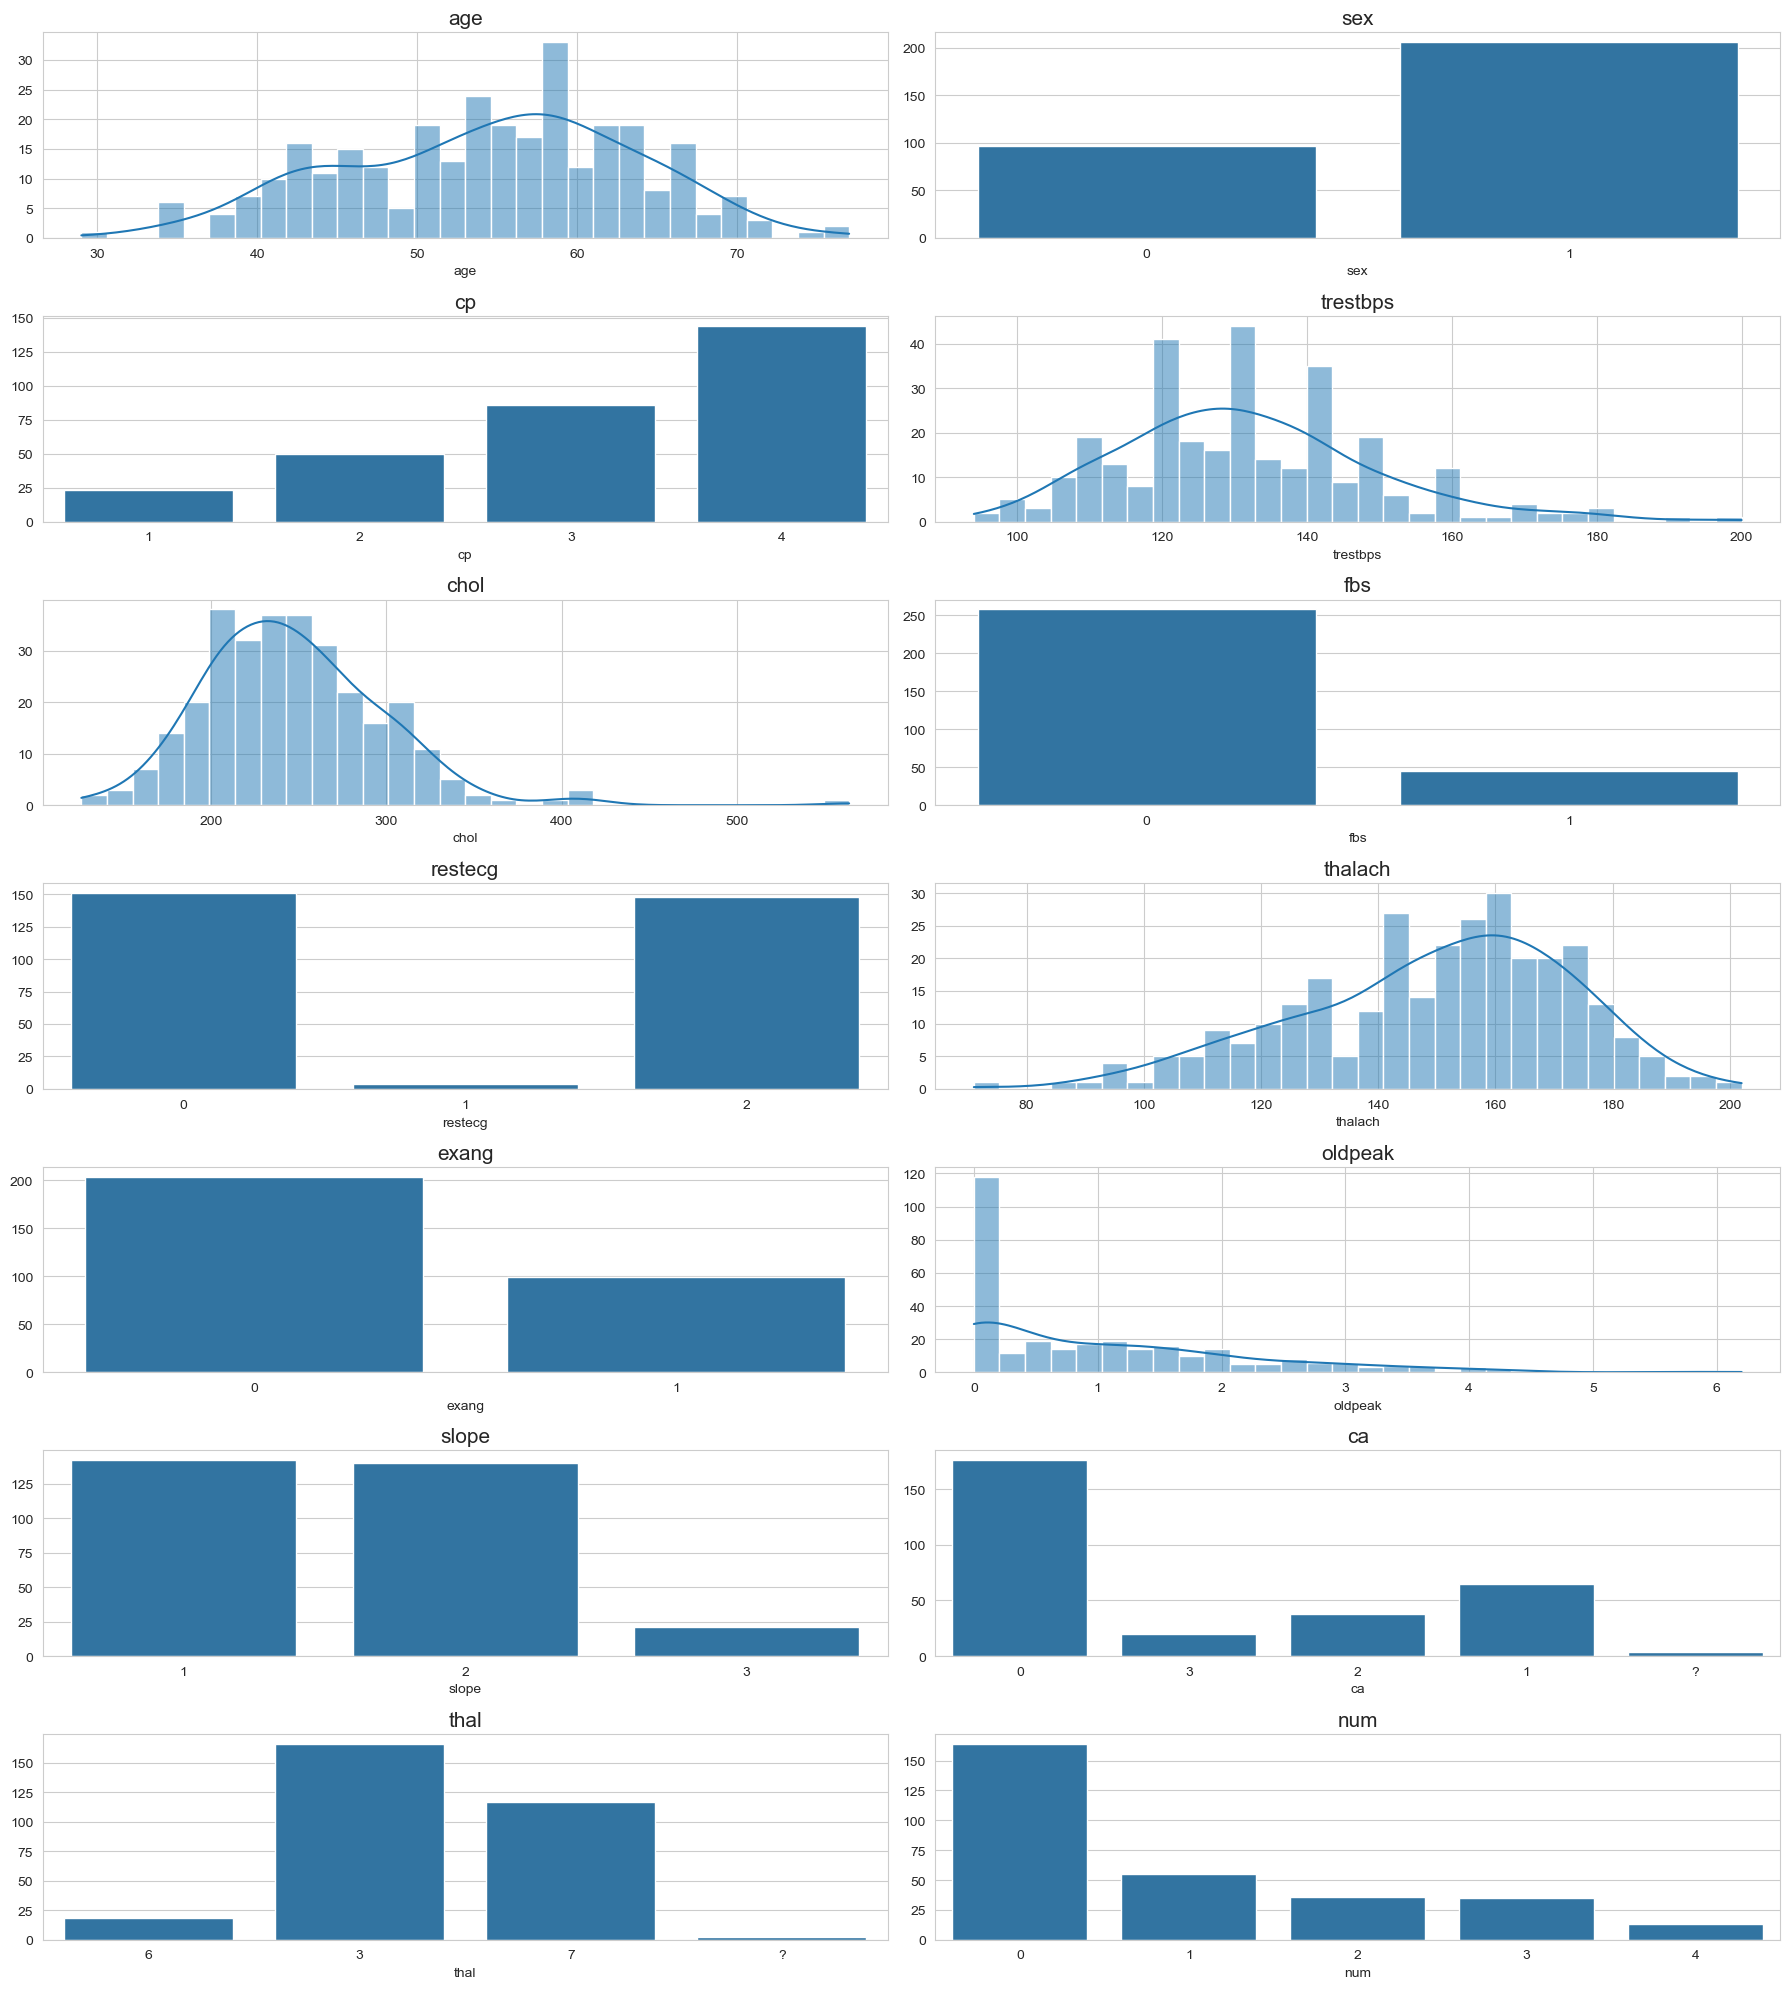

In [20]:
# Configuración de los estilos de Seaborn
sns.set_style("whitegrid")

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(18, 20))

# Listar las columnas para iterar sobre ellas
columns = heart_data.columns

# Iterar sobre cada columna y crear un gráfico adecuado
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]

    # Si la columna tiene menos de 10 valores únicos, consideramos que es categórica y usamos un gráfico de barras
    if heart_data[column].nunique() < 10:
        sns.countplot(data=heart_data, x=column, ax=ax)
    else:
        sns.histplot(data=heart_data, x=column, bins=30, kde=True, ax=ax)

    ax.set_title(column, fontsize=15)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

## Búsqueda de Valores '?': 
Se verifica la presencia de valores '?' en el conjunto de datos, lo cual indica datos faltantes o no válidos.

In [21]:
# Revisaremos si hay valores '?' en el conjunto de datos.
question_mark_values = (heart_data == '?').sum()
question_mark_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

## Limpieza de Datos: 
Se reemplazan los valores '?' por NaN y luego se remplazan los valores faltantes con la mediana de cada columna.

In [22]:
# Revisar y reemplazar valores '?'
heart_data.replace('?', np.nan, inplace=True)

# Convertir las columnas 'ca' y 'thal' a numéricas
heart_data['ca'] = pd.to_numeric(heart_data['ca'])
heart_data['thal'] = pd.to_numeric(heart_data['thal'])

# Imputar los valores faltantes con la mediana de la columna (solo columnas numéricas)
heart_data.fillna(heart_data.median(), inplace=True)

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = heart_data.drop('num', axis=1)
y = heart_data['num'].apply(lambda x: 1 if x > 0 else 0)  # Convertir a binario

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Preparación de Datos: 
Se divide el conjunto de datos en variables independientes (X) y dependiente (y), se binariza la variable objetivo 'num', y se escala el conjunto de características. Además, se divide el conjunto de datos en entrenamiento y prueba.

In [23]:
# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = heart_data.drop('num', axis=1)
y = heart_data['num'].apply(lambda x: 1 if x > 0 else 0) # Convertir a binario

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelo SVM: 
Entrena un modelo de Máquinas de Soporte Vectorial (SVM) con un kernel lineal, hace predicciones en el conjunto de prueba y combina las características originales con las características del SVM.

In [24]:
# Entrenar el modelo SVM con kernel lineal
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)

# Obtener las predicciones del SVM
svm_train_features = svm.predict_proba(X_train_scaled)
svm_test_features = svm.predict_proba(X_test_scaled)


In [25]:
# Combinar las características originales con las características de SVM
X_train_combined = np.hstack((X_train_scaled, svm_train_features))
X_test_combined = np.hstack((X_test_scaled, svm_test_features))

# Construir la red neuronal
model = Sequential()
model.add(Dense(32, input_dim=X_train_combined.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train_combined, y_train, epochs=50, batch_size=10, validation_data=(X_test_combined, y_test))

Epoch 1/50
25/25 [==============================] - 1s 14ms/step - loss: 0.5178 - accuracy: 0.7727 - val_loss: 0.3723 - val_accuracy: 0.8525
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4005 - accuracy: 0.8264 - val_loss: 0.3250 - val_accuracy: 0.8852
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.3779 - accuracy: 0.8430 - val_loss: 0.3214 - val_accuracy: 0.9016
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.3718 - accuracy: 0.8430 - val_loss: 0.3159 - val_accuracy: 0.9016
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.3687 - accuracy: 0.8430 - val_loss: 0.3218 - val_accuracy: 0.9016
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.3637 - accuracy: 0.8388 - val_loss: 0.3278 - val_accuracy: 0.8852
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.3624 - accuracy: 0.8388 - val_loss: 0.3423 - val_accuracy: 0.8852
Epoch 8/50
25/25 [=

In [26]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_combined, y_test)
print(f'Precisión del modelo combinado: {accuracy*100:.2f}%')

# Realizar predicciones
y_pred_nn = (model.predict(X_test_combined) > 0.5).astype("int32")

# Evaluar el modelo de red neuronal
accuracy_nn = accuracy_score(y_test, y_pred_nn)
classification_rep_nn = classification_report(y_test, y_pred_nn)
confusion_mat_nn = confusion_matrix(y_test, y_pred_nn)

print(f'Precisión del modelo combinado: {accuracy_nn*100:.2f}%')
print(classification_rep_nn)
print(confusion_mat_nn)


2/2 [==============================] - 0s 35ms/step - loss: 0.3640 - accuracy: 0.8689
Precisión del modelo combinado: 86.89%
2/2 [==============================] - 0s 4ms/step
Precisión del modelo combinado: 86.89%
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[24  5]
 [ 3 29]]


# Curva ROC y AUC para el modelo combinado:
Esta celda grafica la curva ROC y calcula el AUC para evaluar la capacidad del modelo combinado de clasificar correctamente las clases positivas frente a las negativas.


2/2 [==============================] - 0s 2ms/step


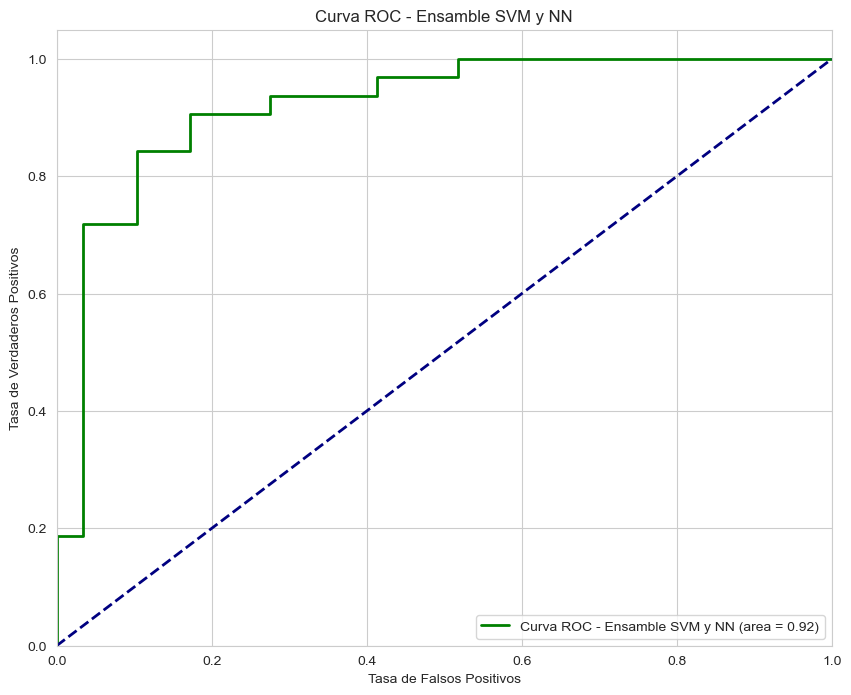

In [27]:
# Curva ROC para el modelo combinado
svm_nn_prob = model.predict(X_test_combined).ravel()
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, svm_nn_prob)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(10, 8))
plt.plot(fpr_nn, tpr_nn, color='green', lw=2, label='Curva ROC - Ensamble SVM y NN (area = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Ensamble SVM y NN')
plt.legend(loc="lower right")
plt.show()


## Matriz de confusión

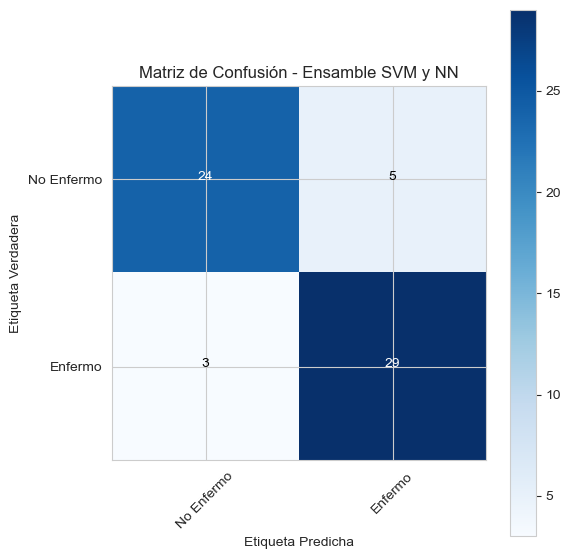

In [28]:
# Función para visualizar la matriz de confusión
def plot_confusion_matrix(cm, classes, title='Matriz de Confusión', cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

    # Mostrar valores en la matriz
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plot_confusion_matrix(confusion_mat_nn, classes=['No Enfermo', 'Enfermo'], title='Matriz de Confusión - Ensamble SVM y NN')

In [30]:
# Crear un nuevo registro con datos inventados
nuevo_registro = {
    'age': 55,
    'sex': 1,
    'cp': 3,
    'trestbps': 140,
    'chol': 250,
    'fbs': 0,
    'restecg': 1,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 0,
    'thal': 2
}

# Convertir el diccionario en un DataFrame
nuevo_registro_df = pd.DataFrame([nuevo_registro])

# Escalar el nuevo registro usando el mismo escalador
nuevo_registro_scaled = scaler.transform(nuevo_registro_df)

# Obtener características de SVM para el nuevo registro
nuevo_registro_svm_features = svm.predict_proba(nuevo_registro_scaled)

# Combinar las características originales con las de SVM
nuevo_registro_combined = np.hstack((nuevo_registro_scaled, nuevo_registro_svm_features))

# Hacer la predicción
prediccion = model.predict(nuevo_registro_combined)
print("Predicción para el nuevo registro: ", "Enfermo" if prediccion[0] > 0.5 else "No Enfermo")


1/1 [==============================] - 0s 22ms/step
Predicción para el nuevo registro:  No Enfermo
